# Summary

different perspectives of logistic regression

- geometric: least square and margin, visualize the **decision boundary**

- probability: maximum likelihood estimation (MLE)


# logistic regression

- most popular model to solve **binary classification**

- loss: logistic loss

- **no closed form solution**, but can use least squares or MLE to solve

## binary classification

- Assumptions:

    1. data are i.i.d

    2. $\beta \sim Bernoulli(p)$

- conditional probability model of label $\mathcal{Y} \in \left\{0, +1 \right\}$ given $\mathbf{x}$ is: 

    $$\text{logit}(p) = \ln \left( \frac{\mathbb{P}(y=1|\mathbf{x})}{\mathbb{P}(y=0|\mathbf{x})}\right)=\beta^T\mathbf{x} + \beta_0$$

    equivalently

    $$
    \mathbb{P}(y=1|\mathbf{x}) \propto \exp(\beta^T\mathbf{x} + \beta_0)
    $$

- a logistic regression model is a function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ for some $\mathbf{\beta} \in \mathbb{R}^d$ and $\beta_0 \in \mathbb{R}$

    output is **probability** that $\mathbf{x}$ belongs to class 1

$$
f(\mathbf{x}) = \sigma(\ \mathbf{\beta}^T\mathbf{x}+\beta_0 ) \in (0, 1)
$$

## multi-class classification

- conditional probability model

$$
\mathbb{P}(y=k|\mathbf{x}) \propto \exp(\beta_k^T\mathbf{x}) = \text{softmax}(\beta_k^T\mathbf{x}), k=0, ..., K
$$




## Logit function

- logistic regression model combines **sigmoid function** with a **linear map** called  **confidence score (logit)**,
    
    $$
    \text{logit}=\mathbf{\beta}^T\mathbf{x}+\beta_0
    $$
    
    e.g., confidence score = 0.8 means the model has 80% confidence that $\mathbf{x}$ belongs to class 1

    if score $>0$, the input is more likely to belong to class 1,
    
    and if score $<0$, the input is more likely to belong to class 0
    
- sigmoid curve turns the **score** into a real number between 0 and 1, 
    
    which is interpreted as **probability** that input belongs to class 1

- logit of conditional probability $p=P(y=1|x)$ is natural log of odds ratio

$$
\text{logit}(p) = \ln\left( \frac{p}{1-p} \right) = \beta^T x + \beta_0
$$



- **logit function is inverse to Sigmoid function.**

$$
\text{logit}(z) = \left [ \frac{\exp(z)}{1+\exp(z)} \right ]^{-1}
$$

## sigmoid function

- Logistic regression use **sigmoid function** $\sigma: \mathbb{R} \rightarrow \mathbb{R}$  to estimate conditional probability $P(y=1 | x)$

$$
\sigma(z)=\frac{1}{1+\exp(-z)}=\frac{\exp(z)}{1+\exp(z)}
$$

- let $s = \beta^T\mathbf{x}$, then

$$
P(y=1 | x) = p=\sigma(\beta^T\mathbf{x})=\frac{\exp(\beta^T\mathbf{x})}{1+\exp(\beta^T\mathbf{x})}
$$

- $\sigma(z)$ is not necessarily a good calibration of $P(y=1 | x)$, i.e., a good estimate for $P(y=1 | x)$

- **properties of sigmoid function**

    1. $\sigma(z) \in (0, 1)$, can be interpreted as a probability
    
    2. $\sigma(-z)=1-\sigma(z)$

    3. derivative of sigmoid function $\sigma'(z)=\sigma(z)[1-\sigma(z)]=\frac{\exp(z)}{(1+\exp(z))^2}$

    4. $\sigma(0)=0.5$, approximately linear aound $y$-axis.

    5.  $\sigma \to 1$ as $x \to +\infty$; $\sigma \to 0$ as $x \to -\infty$

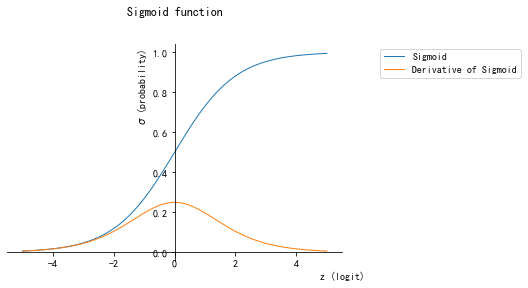

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """Sigmoid function"""
    return 1/(1+np.exp(-x))

def sigmoidPrime(x):
    """Derivative of Sigmoid function"""
    eps=10e-10
    return (sigmoid(x+eps) - sigmoid(x-eps))/(2*eps)

z = np.linspace(-5,5,200)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(z, sigmoid(z), linewidth=1, label='Sigmoid')
plt.plot(z, sigmoidPrime(z), linewidth=1, label='Derivative of Sigmoid')
plt.legend(bbox_to_anchor=(1.1, 1))

plt.xlabel("z (logit)", x=1)
plt.ylabel(r"$\sigma$ (probability)", y=0.8)
plt.title('Sigmoid function', y=1.1)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

# decision rule of logistic regression

## decision rule $\beta^T x $ is linear

for binary classification, assume label to be $y \in \{0,+1\}$. 

the population risk

$$
R(f) = \mathbb{E}(\mathbb{1}(f(x) \neq y))
$$

to calculate the population risk, we use 2 theoroms:

- The expected value of an indicator is the probability of itself

$$
E\left [ \boldsymbol{1}\left ( X) \right ) \right ]=\mathbb{P}\left ( X \right )
$$

- Law of iterated expectation

$$
E\left ( Y \right )=E\left [ E\left ( Y|X \right ) \right ]
$$

$$
\begin{align}
R(f) 
&= \mathbb{E}(\mathbb{1}(f(x) \neq y)) \\[1em]
&= \mathbb{P}(f(x) \neq y) = \mathbb{E}[\mathbb{E}[\mathbb{1}(f(x) \neq y)|x]] \\[1em]
&= \mathbb{E}[\mathbb{1}(f(x) \neq 1)\mathbb{P}(y=1|x)+\mathbb{1}(f(x) \neq 0)\mathbb{P}(y=0|x)] \\[1em]
&=\left\{\begin{matrix}
E\left [ \mathbb{P}\left ( y=1|x \right ) \right ] & f\left ( x \right )=0\\ 
E\left [ \mathbb{P}\left ( y=0|x \right ) \right ] & f\left ( x \right )=1
\end{matrix}\right.
\end{align}
$$

minimize population risk is to minimize the item in the expectation, i.e., $\mathbb{P}\left ( y=1|x \right )$ or $\mathbb{P}\left ( y=0|x \right )$

the ideal function classifier that minimizes the population risk is

$$ \hat{f}(x) = \textrm{1}(P(y=1 | x) > P(y=0 | x)) $$

let **the probability that label is 1 given x** to be

$$
\eta(x) = P(y=1 | x)
$$  

Thus 
$$
\hat{f}(x) = \textrm{1}\left (\eta(x) > \frac{1}{2} \right )
$$


we take

$$
\eta(x) = \frac{\exp(x^T \beta)}{1+\exp(x^T \beta)}
$$

Thus

$$
\hat{f}(x) = \textrm{1} \left [  \exp(\beta^T x) > 1   \right ]
$$

Taking logs, 

$$
\hat{f}(x) = \textrm{1} ( \beta^T x > 0 )
$$
**decision rules is simplely the linear one**, 

$$
\beta^T x > 0
$$

## visualize the decision rule

Consider **2-D** so that we can draw the decision rule. 

assume that we have a **true** $\beta^*=(1,2)$ 

With this choice of $\beta^*$, we see that $\hat{f}(x) = \textrm{1} (\beta^T x > 0)=\textrm{1}(x_1 + 2x_2 > 0)$

Text(0.5, 1.0, 'Decision boundary of linear classifier')

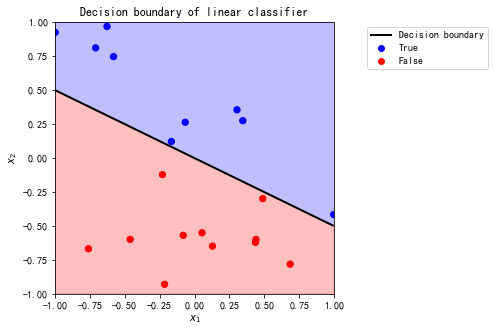

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def decision_rule(x: np.array, betastar: np.array) -> bool:
    """return True if betastar^T x > 0, otherwise False"""
    return x.dot(betastar) > 0


X = 2*np.random.rand(20,2)-1 # generate 20x2 random data points, column1: x1, column2: x2

betastar = np.array([1,2])

y = decision_rule(X, betastar) # labels of data points

plt.figure(figsize=[5,5])

plt.xlabel(r"$x_{1}$")

plt.ylabel(r"$x_{2}$")

ax = plt.gca() # get the current axis
# ax.set_facecolor((.5,.9,.5)) #change the background color
ax.set_xlim([-1,1]) # change the x limit
ax.set_ylim([-1,1]) # change the y limit

# plot decision boundary, which is orthogonal to beta star
x1 = np.arange(-1,1,0.01) 

plt.plot(x1,-x1/2,linewidth=2, color="black") 

# plot data points with labels, color of labels: True as blue, False as red
plt.scatter(X[:,0],X[:,1],c=np.where(y,'blue','red'), s=40) 

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Decision boundary'),
                   Line2D([0], [0], marker='o', color='w', label='True',
                          markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='False',
                          markerfacecolor='red', markersize=8)]

plt.legend(handles=legend_elements, bbox_to_anchor=(1.1, 1))

# plot label regions
x1borders = np.array((-1, -1, 1, 1)) 

x2borders = [0.5,1,1,-0.5]

# Label 1 region as light blue
plt.fill(x1borders,x2borders,color=(0,0,1,0.25))

# [(-1, -1, 1, 1), (0.5, 1, 1, -0.5)]
border1, border2 = tuple(zip(*[(-1,0.5),(1,-0.5),(1,-1),(-1,-1)]))

# Label 0 region as light red
plt.fill(border1, border2,color=(1,0,0,0.25))

plt.title("Decision boundary of linear classifier")

## margin of a linear classifier

- Margin is the shortest distance between a data point $\mathbb{x}_i$ and decision boundary $\mathcal{H}$

    Take label $\mathcal{Y} = \left\{ -1, +1\right\}, \mathbb{x}_i \in \mathbb{R}^d, \mathbb{\theta} \in \mathbb{R}^d$

$$
\text{margin}(\mathbb{\theta}) = \min \frac{\mathbb{y}_i \left<\mathbb{x}, \mathbb{\theta} \right>}{\left\| \mathbb{\theta}\right\|} = \underset{ \mathbb{v}|\mathbb{v} \in \mathcal{H}}{\min} \left\| \mathbb{v} - \mathbb{x}_i\right\|
$$

- The larger the margin, the more confident the predicted label is correct

- $\left\| \mathbb{\theta}\right\|$ is used for normalization, to eliminate effect of weight size

- the larger the inner product of $\mathbb{x}$ and $\mathbb{\theta}$, the larger the margin. when $\mathbb{x}$ and true $\mathbb{\theta}$ have same direction, inner product is largest.

- decision boundary/separating hyperplane: a set $\mathcal{H} = \left\{ \mathbb{v}| \left<\mathbb{v}, \mathbb{\theta} \right>=0\right\}$

    the label of data point fall on hyperplane is unknown

    the label fall outside the hyperplane is either -1 or +1

## logistic regression also fit into surrogate loss perspective

take the label to be $y \in \{-1,+1\}$. 

Recall from class that we derived logistic regression from a perspective of **MLE**. 

Turns out that it also fits into this **surrogate loss** perspective.

We can rewrite the logistic regression model as
$$
P_\beta(y=1 | x) =\frac{\exp(\beta^T x)}{\exp(\beta^T x)+\exp(-\beta^T x)}
$$

subtracting $1-P_\beta(y=1 | x)$ we also get
$$
P_\beta(y=-1 | x) = \frac{\exp(-\beta^T x)}{\exp(\beta^T x)+\exp(-\beta^T x)}
$$

thus

$$
P_\beta(y|x) = \frac{1}{1+\exp(- 2 y \beta^T x)}
$$

Now, from the **MLE** perspective, we wish to **maximize** the likelihood of $\beta$. 

Taking natural logs and multiplying by $-1$,

we wish to **minimize** the **negative log-likelihood (binary cross-entropy loss)**



$$
NLL(\beta) =-\ln L(\beta) = \sum_{i=1}^n \left [ -y_{i}\ln(p_{i})-(1-y_{i})\ln(1-p_{i}) \right ]
$$



plug in

$$
p_{i}=P_\beta(y_{i}|x_{i}) = \frac{1}{1+\exp(- 2 y_{i} \beta^T x_{i})}
$$

we get

$$
NLL(\beta) =-\ln L(\beta) = \sum_{i=1}^n \ln(1+\exp(-2 y_i \beta^T x_i))
$$

$$
\hat{\beta }=\arg\min_{\beta }\sum_{i=1}^n \ln(1+\exp(-2 y_i \beta^T x_i))
$$


Then, logistic loss of **example i** is 

$$
\ln(1+\exp(-2 y_i \beta^T x_i))
$$

empirical risk of function is  (average of total logistic loss over n examples)

$$
\hat{R}=\frac{1}{n} \sum_{i=1}^n \ln(1+\exp(-2 y_i \beta^T x_i))
$$

At this point we can define the logistic regression loss in terms of a **margin**. 

Let margin $s=y (\beta^T x)$, 

the logistic loss function $g(z)$ is:

$$
g(z) = \log_\mathbf2(1+\exp(-2 s)) = \ln(1+\exp(-2s))\ /\ \mathbf{\ln 2}
$$

**Note when label is $y \in \{0,+1\}$**


$$
P_\beta(y|x) = \frac{\exp(yx^{T}\beta )}{1+\exp(x^{T}\beta)}
=\left\{\begin{matrix}
P_\beta(y=1 | x) =  \frac{\exp(x^T \beta)}{1+\exp(x^T \beta)}   \\
P_\beta(y=0 | x) =  \frac{1}{1+\exp(x^T \beta)} \\
\end{matrix}\right.
$$

$$
NLL(\beta) =-\ln L(\beta) = \sum_{i=1}^n[ \ln(1+\exp(\beta^T x_i))-y_i \beta^T x_i]
$$

$$
\hat{\beta }=\arg\min_{\beta }\sum_{i=1}^n[ \ln(1+\exp(\beta^T x_i))-y_i \beta^T x_i]
$$

$$
\hat{R}=\frac{1}{n} \sum_{i=1}^n [ \ln(1+\exp(\beta^T x_i))-y_i \beta^T x_i]
$$

### $\ln 2$ is used to scaling

- Most people will just drop the $\ln2$, because decision boundary is orthogonal to $\beta$, so scaling $\beta$ doesn't change the decision boundary.

- but plot of logistic loss without scaling will lie underneath 0/1 loss

- plot of logistic loss with scaling just intersects 0/1 loss at point (0, 1)

Text(0.5, 1.0, 'Scaling logistic loss with $\\ln2$')

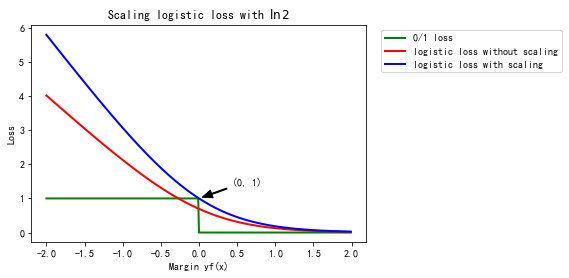

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

# s is margin
s = np.arange(-2,2,0.01)

fig, ax = plt.subplots()

# 0/1 loss 
ax.plot(s,(s<0)*1.,linewidth=2,color='green',label='0/1 loss')

# logistic loss without scaling 
ax.plot(s, np.log(1+np.exp(-2*s)),linewidth=2,color='red',label='logistic loss without scaling')

# logistic loss with scaling
ax.plot(s, np.log(1+np.exp(-2*s))/np.log(2),linewidth=2,color='blue',label='logistic loss with scaling')

ax.legend(bbox_to_anchor=(1.6, 1))

ax.annotate(text='(0, 1)', xy=(0, 1), xycoords='data',
            xytext=(0.6, 0.3), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, facecolor='black', shrink=0.1))

plt.xlabel("Margin yf(x)")

plt.ylabel("Loss")

plt.title(r"Scaling logistic loss with $\ln2$")

# Binary classification with Logistic regression

## Load MNIST

In [55]:
# Load MNIST train data (60000) and test data (10000)
import numpy as np
import matplotlib.pyplot as plt 

filename = "/Users/wenxinxu/Desktop/SDS565/data/MNIST/"

## training data and labels
# load training image data
f=open(filename + 'train-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

# load training labels
f=open(filename + 'train-labels-idx1-ubyte','rb')
g=f.read()
f.close()

n_train = 60000
n_test = 10000
dimH, dimW = 28, 28

# create training matrix 60000 x 28 x 28
train=np.array(bytearray(gimage[16:])).reshape(n_train,dimH,dimW)
# train.shape = (n_train,dimH,dimW)
train_labels=np.array(bytearray(g[8:]))

## load image data
f=open(filename + 't10k-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open(filename + 't10k-labels-idx1-ubyte','rb')
g=f.read()
f.close()

# create test matrix 10000 x 28 x 28
test=np.array(bytearray(gimage[16:])).reshape(n_test,dimH,dimW)
# test.shape=(n_test,dimH,dimW)
test_labels=np.array(bytearray(g[8:]))

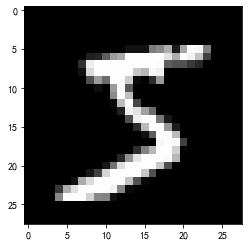

In [56]:
# plot first training data
plt.imshow(train[0,:,:],cmap='gray')

## make training set and test set

In [64]:
# select images of digits 0 and 8 from data to do binary classification
# make label True (digit 8), False (digit 0)
X08 = train[np.logical_or(train_labels==0,train_labels==8)]
y08 = train_labels[np.logical_or(train_labels==0,train_labels==8)] == 8
X08.shape = (X08.shape[0], X08.shape[1]*X08.shape[2])   # reshape training data to (60000, 28*28)

X08test =  test[np.logical_or(test_labels==0,test_labels==8)]
y08test = test_labels[np.logical_or(test_labels==0,test_labels==8)] ==8
X08test.shape = (X08test.shape[0], X08test.shape[1]*X08test.shape[2])   # reshape test data to (10000, 28*28)

In [63]:
X08.shape

(11774, 784)

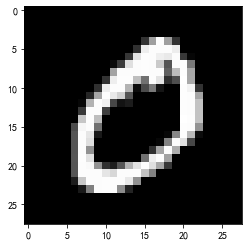

In [58]:
# plot first training data 
plt.imshow(X08[0].reshape(28,28),cmap='gray')

## Logistic Regression Newton's method implemented from scratch

For logistic regression, typically use $\ell_2$ regularization.  

$$
\hat{\theta} = \underset{\theta}{\arg\min}\frac{1}{n} \sum_{i=1}^n \left[ \ln(1+\exp(\theta^T x_i)) - y_i \theta^T x_i \right] + \frac{\lambda}{2} \|\theta\|_2^2
$$

In [65]:
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss

def sigmoid(s: float) -> float:
    return 1/(1+np.exp(-z))


def variance(z):
    return np.exp(z)/(1+np.exp(z))**2


n = X08.shape[0]                    # sample size
betahat = np.zeros(X08.shape[1])
lam=0.01                            # lambda regularization parameter
errors=np.zeros(100)

# Traning for 100 epochs
for k in range(100):
    mu = X08 @ betahat
    grad = X08.T @ (sigmoid(mu) - y08)/n    # gradient of loss
    hess = (X08.T * variance(mu))@X08/n     # Hessian matrix 784 by 784 matrix
    betahat = betahat - 0.5*np.linalg.solve(hess+lam*np.eye(784),grad)

    # logistic loss of predicted label and true label
    errors[k] = log_loss(y08, sigmoid(X08@betahat))

plt.plot(np.log(errors))
plt.xlabel("Epoch")
plt.ylabel("Logistic loss")
plt.title("Training error")

testerror = zero_one_loss(y08test,X08test@betahat>0)
print(f"test error (0/1 loss): {testerror}")

test error (0/1 loss): 0.010747185261003045


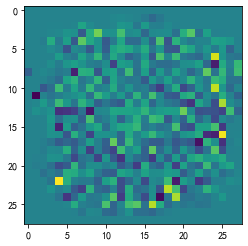

In [ ]:
# plot estimated weight
plt.imshow(betahat.reshape(28,28))

## sklearn Logistic regression

In [ ]:
sklearn.linear_model.LogisticRegression(penalty='l2', 
        dual=False, tol=0.0001, C=1.0, 
        fit_intercept=True, intercept_scaling=1, 
        class_weight=None, random_state=None, solver='lbfgs', 
        max_iter=100, multi_class='auto', 
        verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Parameters of sklearn.linear_model.LogisticRegression

- penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

- tol: float, default=1e-4. Tolerance for stopping criteria

- C: float, default=1.0. inverse of regularization parameter $C = \frac{1}{\lambda}$

- fit_intercept: bool, default=True. If an intercept will be added to decision function

- solver: algorithm used in optimization. Default is ‘lbfgs’. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs. The choice of the algorithm depends on the penalty chosen. 

### $l_2$ regularization with Newton's method

In [82]:
from sklearn.linear_model import LogisticRegression as lg 

betahatlr = lg(C=100, penalty="l2", solver="newton-cg").fit(X08,y08)

train_error1 = log_loss(y08,sigmoid(X08@betahatlr.coef_[0]))
train_error2 = log_loss(y08, betahatlr.predict_proba(X08))
train_error3 = log_loss(y08,sigmoid(X08@betahat))

test_error = zero_one_loss(y08test,betahatlr.predict(X08test))

round(train_error1, 5), round(train_error2, 5), round(train_error3, 5), round(test_error, 5)

(0.0, 0.0, 0.0, 0.01024)

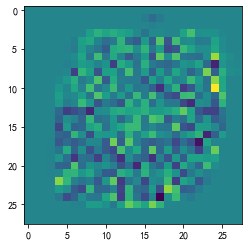

In [83]:
plt.imshow(betahatlr.coef_.reshape(28,28))

### $\ell_1$ regularization

$$
\frac{1}{n} \sum_{i=1}^n \ln(1+\exp(\theta^T x_i)) - y_i \langle x_i , \theta \rangle + \frac{1}{C} \|\theta\|_1^2
$$

with more sparsity the resulting parameters are more interpretable and interestingly have better performance.

In [86]:
betahatlr = lg(penalty='l1',C=.001, solver="saga").fit(X08,y08)

train_error1 = log_loss(y08,sigmoid(X08@betahatlr.coef_[0]))
train_error2 = log_loss(y08, betahatlr.predict_proba(X08))

test_error = zero_one_loss(y08test,betahatlr.predict(X08test))

assert round(train_error1, 5) == round(train_error2, 5)
print(round(test_error, 5))

0.00614


/opt/anaconda3/envs/d2l/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


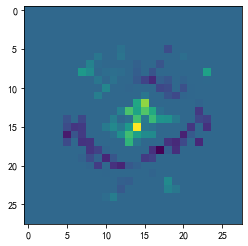

In [87]:
plt.imshow(betahatlr.coef_.reshape(28,28))